# <p><center style="font-family:newtimeroman;font-size:180%;"> Rice Variety Classification and Quality Evaluation Using Image Analysis </center></p>
### Table of contents:

* [Import Libraries](#1)
* [Read Data](#3)
* [Visualization Of Dataset](#4)
* [Split Data into Train and Test](#5)
* [Data Augmentation](#6)
* [Train CNN Model](#7)
* [Evaluate The Model](#8)
* [Save Model](#9)

**<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
dataset_path = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'
images = []
labels = []
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)
df = pd.DataFrame({'image': images, 'label': labels})
df

,image,label
0,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
1,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
2,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
3,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
4,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
...,...,...
74995,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74996,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74997,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74998,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala


**<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

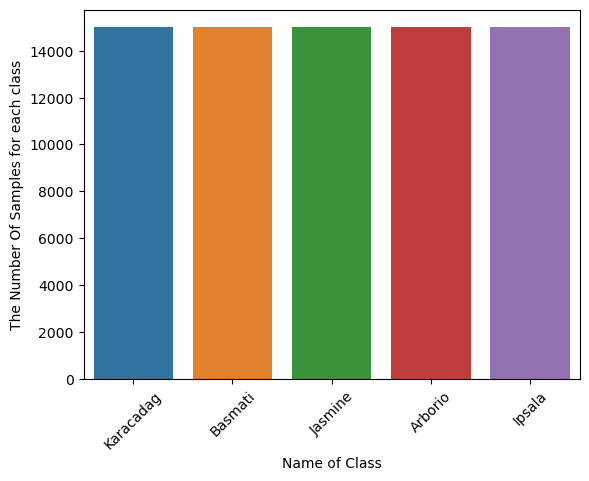

In [3]:
ax = sns.countplot(x=df.label)
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")
plt.xticks(rotation=45)
plt.show()

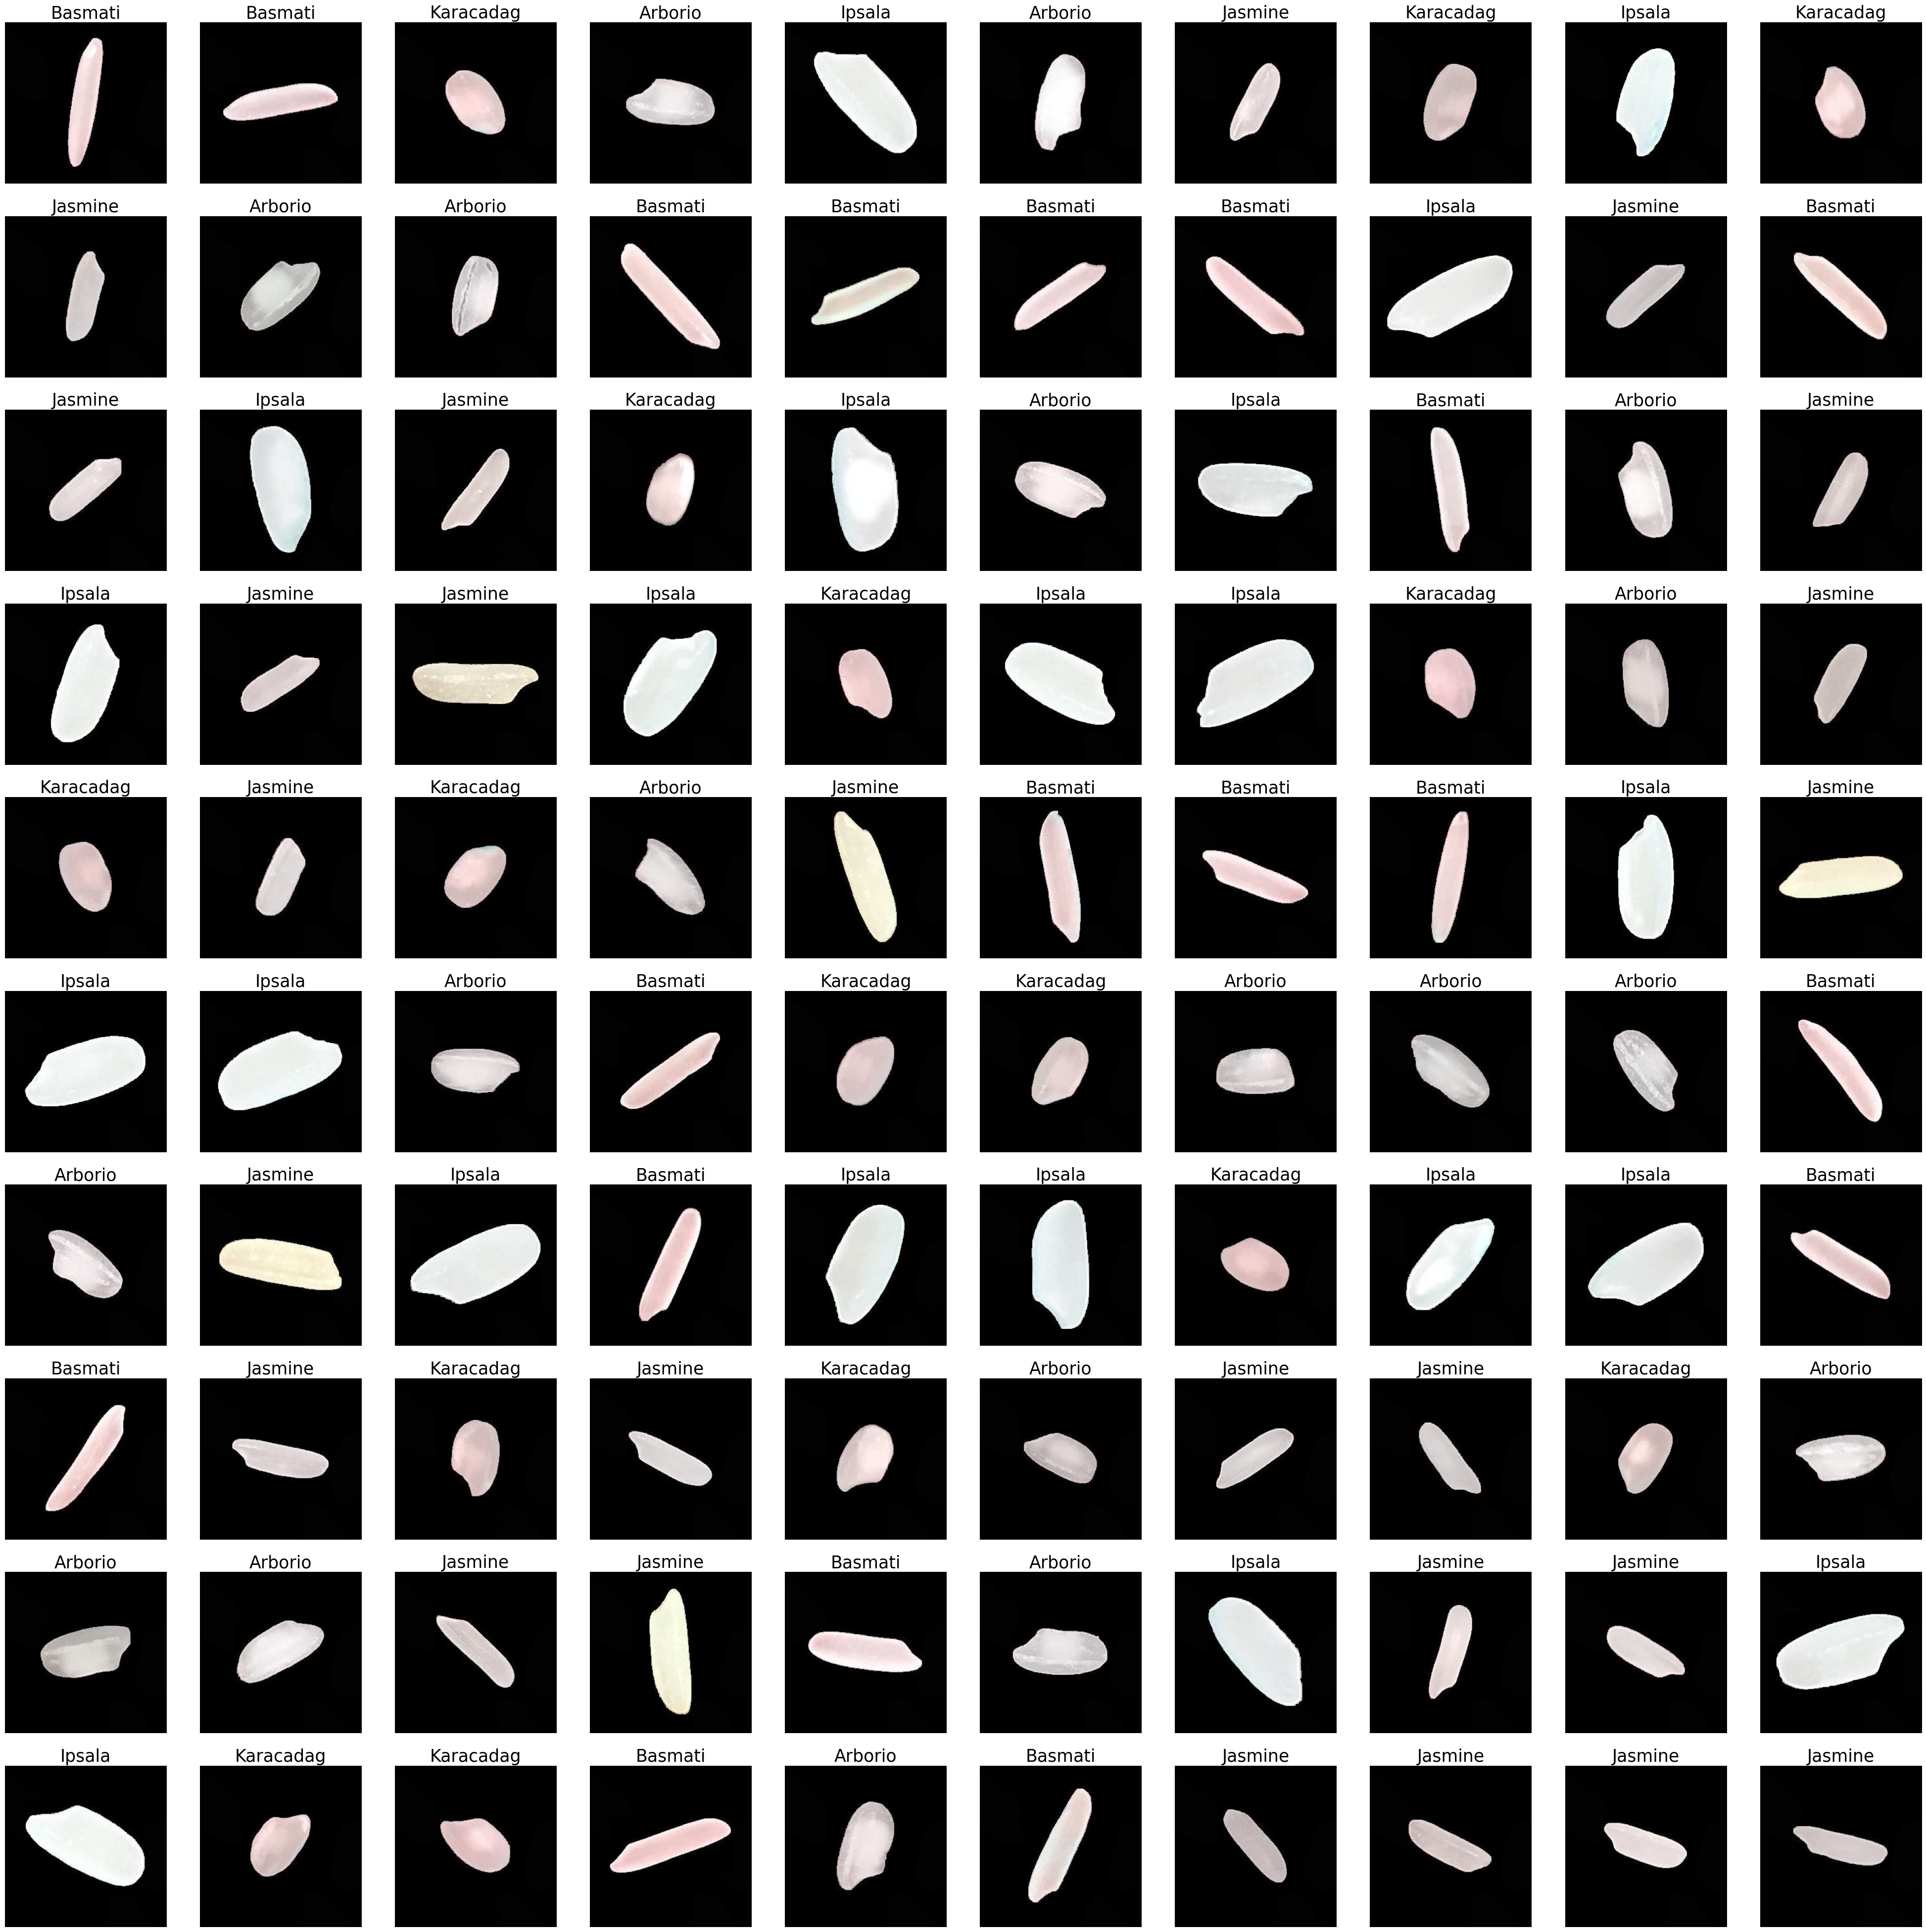

In [4]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),100)):
    plt.subplot(10,10,n+1)
    img=cv2.imread(df.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Split Data into Train and Test </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

<a id="6"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Data Augmentation </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [6]:
image_size = (50, 50)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


<a id="7"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Modeling </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [7]:
input_shape = (50, 50, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               9

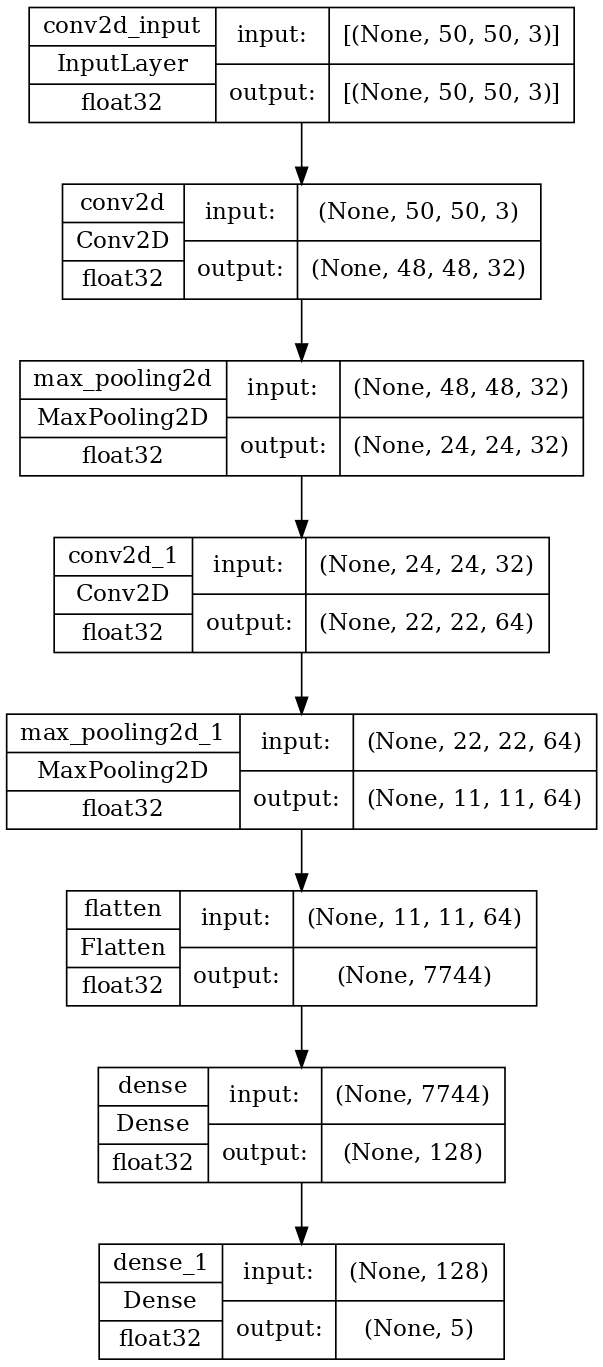

In [9]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [10]:
model.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
1875/1875 [==============================] - 782s 411ms/step - loss: 0.3799 - accuracy: 0.8453 - val_loss: 0.2471 - val_accuracy: 0.9049
Epoch 2/10
1875/1875 [==============================] - 251s 134ms/step - loss: 0.1600 - accuracy: 0.9406 - val_loss: 0.1233 - val_accuracy: 0.9563
Epoch 3/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.1068 - accuracy: 0.9615 - val_loss: 0.0814 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0797 - accuracy: 0.9710 - val_loss: 0.0867 - val_accuracy: 0.9704
Epoch 5/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0693 - accuracy: 0.9756 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0571 - accuracy: 0.9804 - val_loss: 0.0445 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0506 - accuracy: 0.9825 - val_

<a id="8"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [11]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.379944,0.845300,0.247096,0.904933
1,0.159987,0.940600,0.123271,0.956333
2,0.106808,0.961467,0.081442,0.971067
3,0.079689,0.970950,0.086704,0.970400
4,0.069326,0.975617,0.041515,0.986800
5,0.057148,0.980383,0.044547,0.985000
6,0.050569,0.982500,0.047263,0.985267
7,0.045892,0.984083,0.049710,0.983333
8,0.044240,0.984883,0.046143,0.982800
9,0.046664,0.984083,0.059000,0.978000


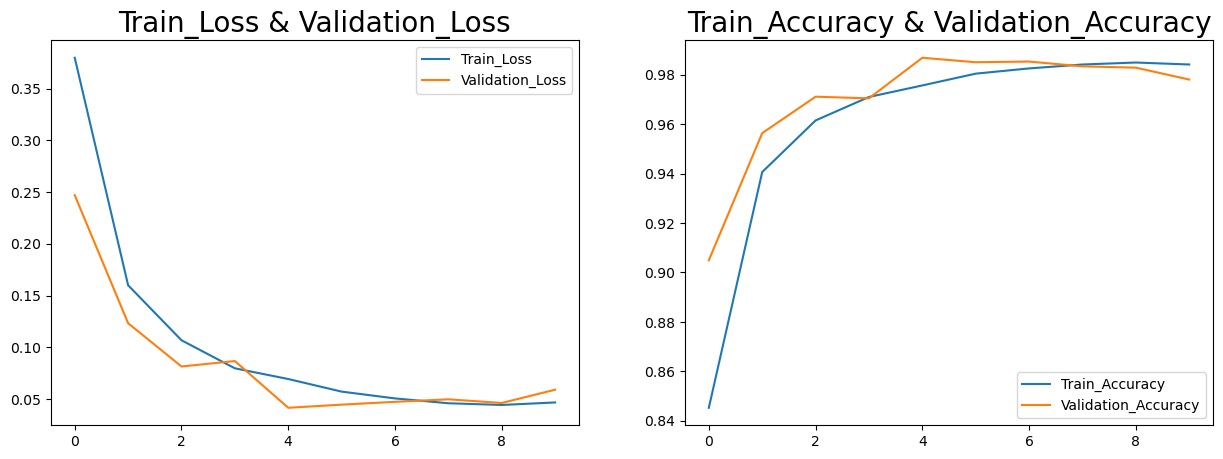

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [13]:
score, acc = model.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)

469/469 [==============================] - 39s 83ms/step - loss: 0.0587 - accuracy: 0.9793
Test Loss = 0.0587092861533165
Test Accuracy = 0.9793333411216736


In [14]:
X_test, y_test, y_pred = [], [], []
batch = next(test_generator)
images, labels = batch[0], batch[1]
class_indices = np.argmax(labels, axis=1)
y_test.extend(class_indices)
X_test.extend(images)

predictions = model.predict(np.array(X_test))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_test,y_pred
df

1/1 [==============================] - 0s 106ms/step


,Actual,Prediction
0,1,1
1,4,4
2,1,1
3,2,2
4,2,2
5,2,2
6,1,1
7,4,4
8,3,3
9,3,3


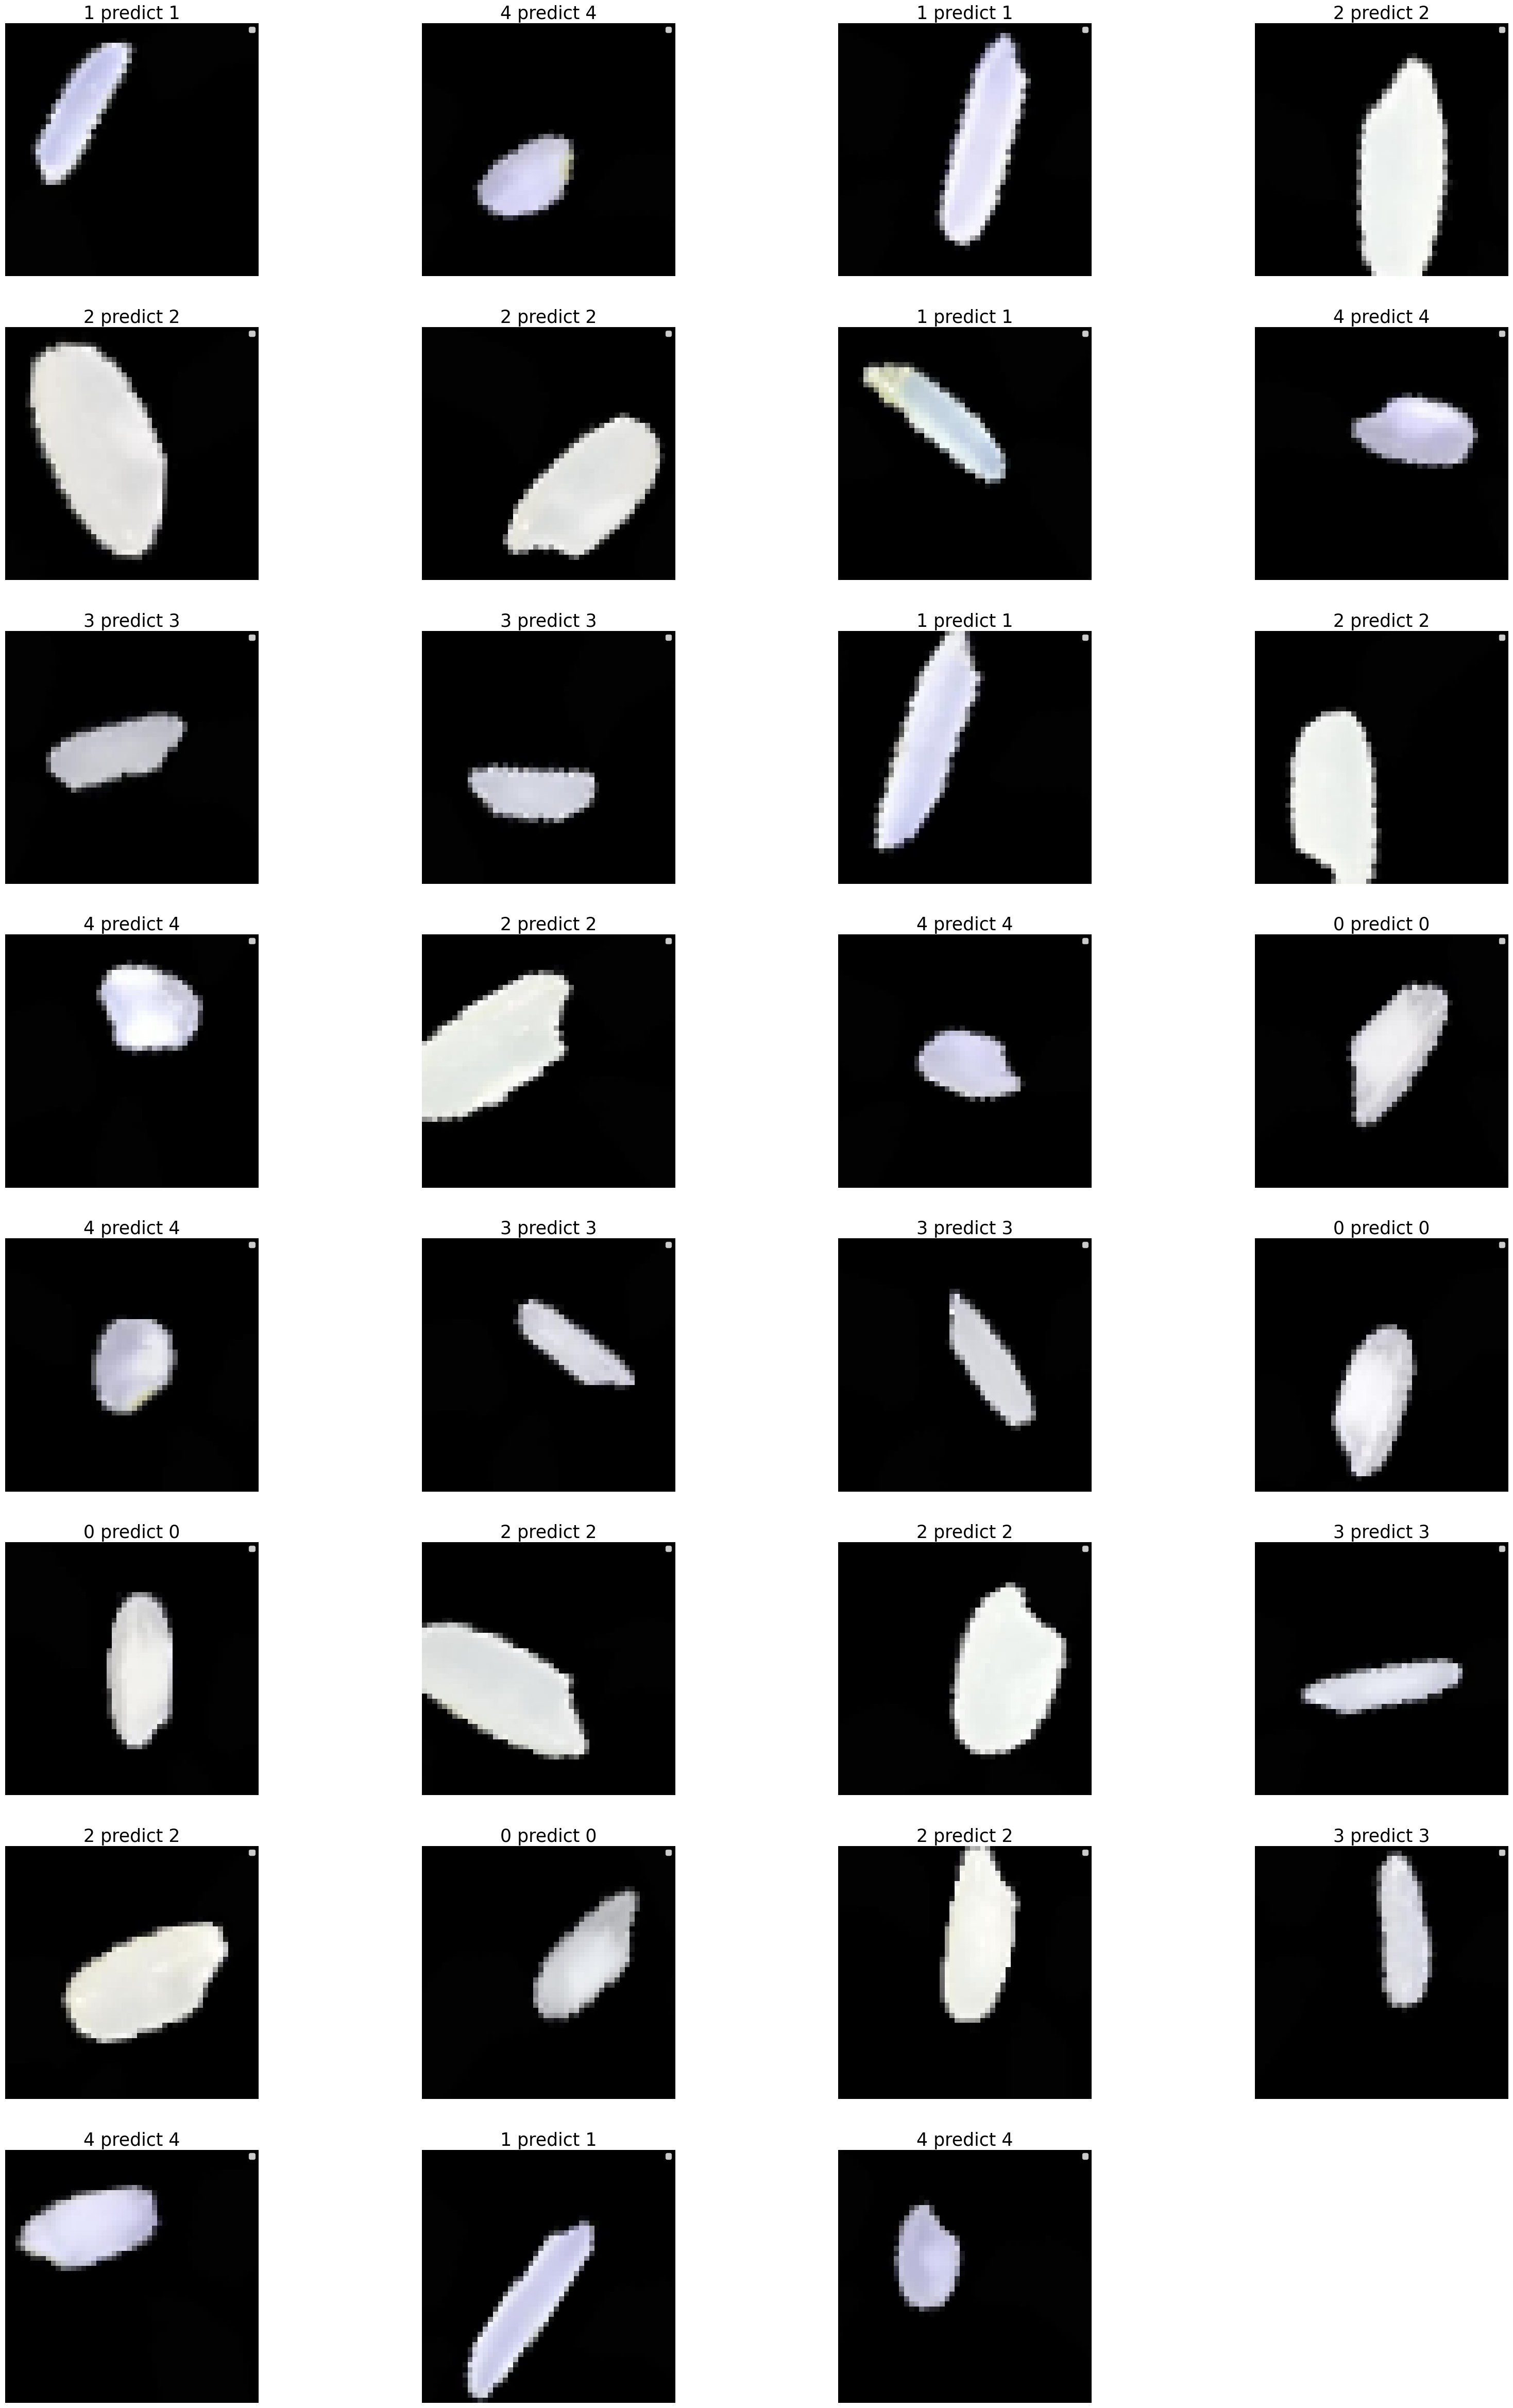

In [15]:
plt.figure(figsize=(40,60))
n=1
for i in range(31):
    plt.subplot(8,4,n)
    plt.imshow(X_test[i])
    plt.axis('off')
    ti=str(y_test[i])+' predict '+str(y_pred[i])
    plt.title(ti,fontsize=25)
    plt.legend()
    n+=1

array([[4, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 9, 0, 0],
       [0, 0, 0, 7, 0],
       [0, 0, 0, 0, 7]])

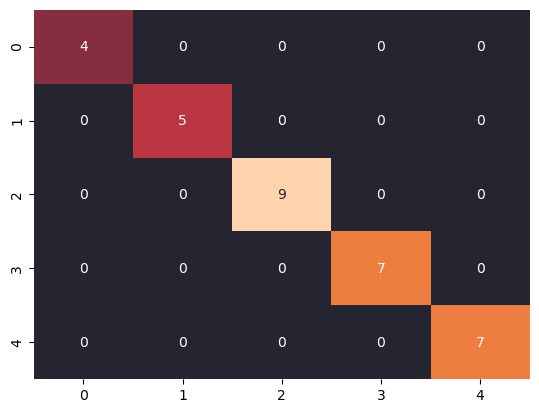

In [16]:
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, center = True,cbar=False,annot=True)
CM

In [17]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



<a id="9"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Save Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [18]:
model.save('/kaggle/working/Rice_model.h5')